In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ZIONO_weekly_return_volatility.csv")
df_21 = df[df.Year==2021].copy()
df_21.label.fillna(method="ffill", inplace=True)
df_21.set_index("Week_Number", inplace=True)
df_21.head(10)

df_22 = df[df.Year==2022].copy()
df_22.label.fillna(method="ffill", inplace=True)
df_22.set_index("Week_Number", inplace=True)
df_22.head(15)

,Year,mean_return,volatility,label
Week_Number,,,,
1,2022,-0.20120,0.842329,red
2,2022,0.10020,0.604448,green
3,2022,0.15250,0.591757,green
4,2022,-0.35760,1.847664,red
5,2022,-0.12060,0.762250,red
6,2022,-0.09720,0.904275,red
7,2022,0.18800,0.813669,green
8,2022,-0.14250,0.696589,red
9,2022,0.20760,1.526874,green


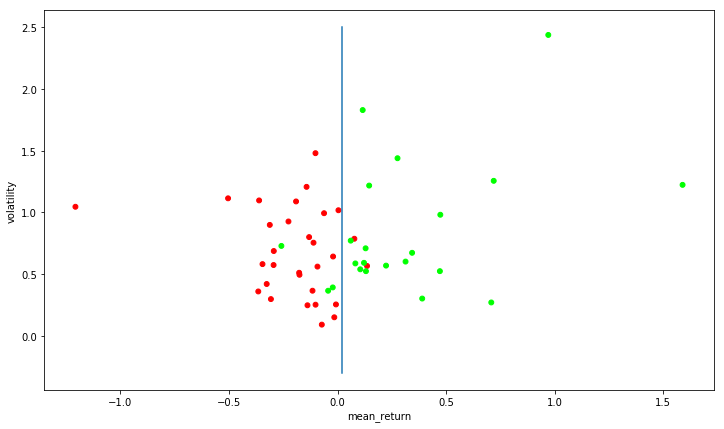

In [4]:
import numpy as np

# plt.figure(figsize=(30, 18))
plt.rcParams['figure.figsize'] = (12.0, 7.0)
colors = []
texts = []
for i in range(1, len(df_21.label) + 1):
    colors.append('#FF0000' if df_21.label[i] == 'red' else '#00FF00')
    texts.append(f"{i+1}")

df_21.plot.scatter("mean_return", "volatility", s=24, c=colors)

pos = 0.02
xpoints = np.array([pos, pos])
ypoints = np.array([-0.3, 2.5])

# seperate line is x=0.02

plt.plot(xpoints, ypoints)

plt.show()

In [5]:
def get_seperate(x):
    return (x["mean_return"] <= 0.02 and x["label"] == "red") or (x["mean_return"] > 0.02 and x["label"] == "green")

df_21["seperate"] = df_21[["mean_return","label"]].apply(lambda x: get_seperate(x),axis=1)

df_21_good = df_21[df_21.seperate]
df_21_good.head()

,Year,mean_return,volatility,label,seperate
Week_Number,,,,,
3,2021,0.9710,2.437100,green,True
4,2021,-0.5042,1.114784,red,True
5,2021,0.1458,1.217830,green,True
6,2021,-0.1016,1.479947,red,True
7,2021,-0.3120,0.899532,red,True


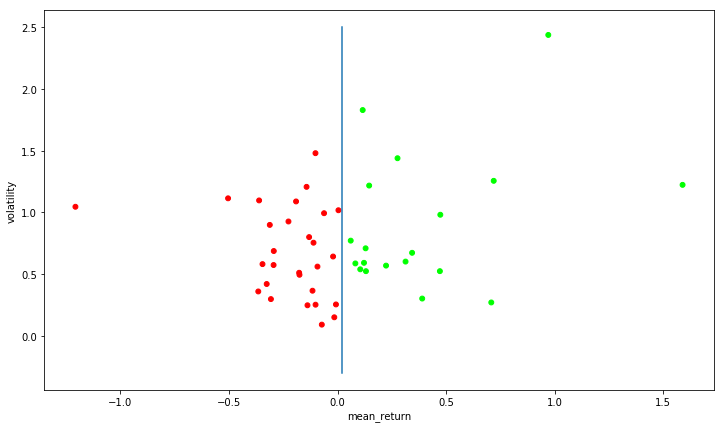

In [7]:
colors = []

for i in df_21_good.index:
    colors.append('#FF0000' if df_21.label[i] == 'red' else '#00FF00')


df_21_good.plot.scatter("mean_return", "volatility", s=24, c=colors)

pos = 0.02
xpoints = np.array([pos, pos])
ypoints = np.array([-0.3, 2.5])

# seperate line is x=0.02

plt.plot(xpoints, ypoints)

plt.show()

In [8]:
df_22["predict_lable"] = df_22["mean_return"].apply(lambda x: "red"  if x <= 0.02 else "green") 
df_22.head()  

,Year,mean_return,volatility,label,predict_lable
Week_Number,,,,,
1,2022,-0.2012,0.842329,red,red
2,2022,0.1002,0.604448,green,green
3,2022,0.1525,0.591757,green,green
4,2022,-0.3576,1.847664,red,red
5,2022,-0.1206,0.762250,red,red
